# Bar Comparison

This study aims to replicate and analyze different types of bars as described in Chapter 2 of "Advances in Financial Machine Learning." Specifically, we examine the S&P 500 E-Mini futures contract "ESH4" for the time range between January 2024 and February 2024.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from onetrading.data.bar import TimeBar, TickBar, VolumeBar, DollarBar, TickImbalanceBar, VolumeImbalanceBar, DollarImbalanceBar

In [2]:
rerun = True # Whether to refresh pickled data
symbol = "ESH4"
start_date = "2024-01-01"
end_date = "2024-02-29"
imb_bar_start_date = "2023-12-15" # needed for warm up
tz = "US/Eastern"

In [3]:
time = TimeBar(symbol, tz)
tick = TickBar(symbol, tz)
volume = VolumeBar(symbol, tz)
dollar = DollarBar(symbol, tz)
tib = TickImbalanceBar(symbol, tz)
vib = VolumeImbalanceBar(symbol, tz)
dib = DollarImbalanceBar(symbol, tz)

In [4]:
# some parameters are chosen to ensure roughly equal number of bars each day
if rerun:
    time_bar = time.get_bar(start_date, end_date, freq="3min")
    time_bar.to_pickle("data/time_bar.pkl")
    
    tick_bar = tick.get_bar(start_date, end_date, bar_size=1000)
    tick_bar.to_pickle("data/tick_bar.pkl")
    
    volume_bar = volume.get_bar(start_date, end_date, bar_size=4000)
    volume_bar.to_pickle("data/volume_bar.pkl")
    
    dollar_bar = dollar.get_bar(start_date, end_date, bar_size=20000000)
    dollar_bar.to_pickle("data/dollar_bar.pkl")

    tib_bar = tib.get_bar(imb_bar_start_date, end_date, initial_size=1000, alpha=0.97, max_imbalance=10)
    tib_bar = tib_bar.loc[tib_bar["ts_event"] >= start_date]
    tib_bar.to_pickle("data/tib_bar.pkl")

    vib_bar = vib.get_bar(imb_bar_start_date, end_date, initial_size=1000, alpha=0.97, max_imbalance=50)
    vib_bar = vib_bar.loc[vib_bar["ts_event"] >= start_date]
    vib_bar.to_pickle("data/vib_bar.pkl")

    dib_bar = dib.get_bar(imb_bar_start_date, end_date, initial_size=1000, alpha=0.97, max_imbalance=250000)
    dib_bar = dib_bar.loc[dib_bar["ts_event"] >= start_date]
    dib_bar.to_pickle("data/dib_bar.pkl")   
else:
    time_bar = pd.read_pickle("data/time_bar.pkl")
    tick_bar = pd.read_pickle("data/tick_bar.pkl")
    volume_bar = pd.read_pickle("data/volume_bar.pkl")
    dollar_bar = pd.read_pickle("data/dollar_bar.pkl")
    tib_bar = pd.read_pickle("data/tib_bar.pkl")
    vib_bar = pd.read_pickle("data/vib_bar.pkl")
    dib_bar = pd.read_pickle("data/dib_bar.pkl")

## Price Comparison of Various Bar Types    

We plot the VWAP of each bar type for a single day to compare the price series of each bar type.

In [5]:
vwap_time_bar = time_bar[["ts_event", "vwap"]].rename(columns={"vwap": "time"})
vwap_tick_bar = tick_bar[["ts_event", "vwap"]].rename(columns={"vwap": "tick"})
vwap_volume_bar = volume_bar[["ts_event", "vwap"]].rename(columns={"vwap": "volume"})
vwap_dollar_bar = dollar_bar[["ts_event", "vwap"]].rename(columns={"vwap": "dollar"})
vwap_tib_bar = tib_bar[["ts_event", "vwap"]].rename(columns={"vwap": "tick imb"})
vwap_vib_bar = vib_bar[["ts_event", "vwap"]].rename(columns={"vwap": "volume imb"})
vwap_dib_bar = dib_bar[["ts_event", "vwap"]].rename(columns={"vwap": "dollar imb"})

vwap = pd.merge(vwap_time_bar, vwap_tick_bar, on="ts_event", how="outer")
vwap = pd.merge(vwap, vwap_volume_bar, on="ts_event", how="outer")
vwap = pd.merge(vwap, vwap_dollar_bar, on="ts_event", how="outer")
vwap = pd.merge(vwap, vwap_tib_bar, on="ts_event", how="outer")
vwap = pd.merge(vwap, vwap_vib_bar, on="ts_event", how="outer")
vwap = pd.merge(vwap, vwap_dib_bar, on="ts_event", how="outer")

vwap = vwap.interpolate(method="linear")
vwap = vwap.loc[vwap['ts_event'] >= vwap['ts_event'].max().strftime("%Y-%m-%d")]
vwap = vwap.sort_values("ts_event")
vwap = vwap.set_index("ts_event")

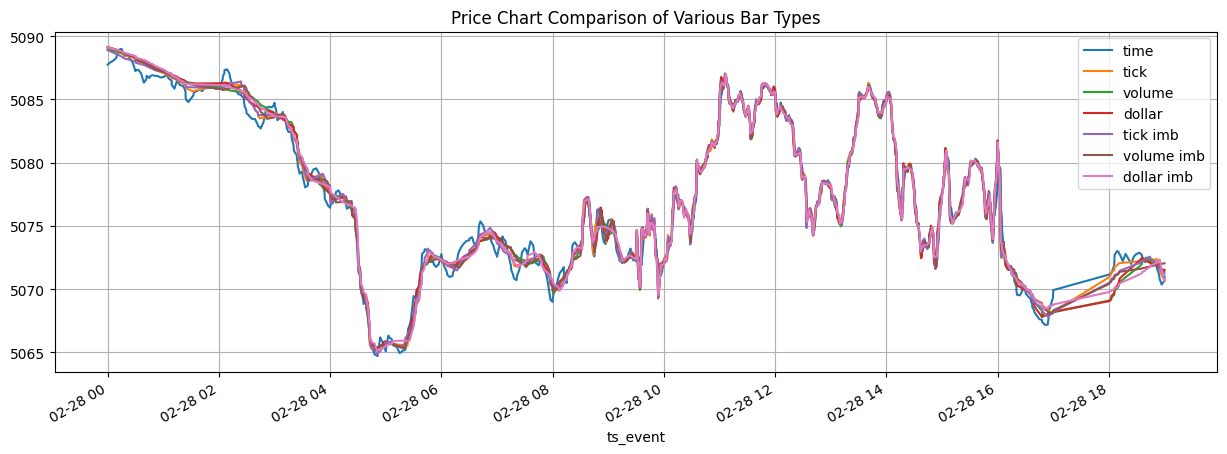

In [6]:
vwap.plot(y=["time", "tick", "volume", "dollar", "tick imb", "volume imb", "dollar imb"], figsize=(15, 5), title="Price Chart Comparison of Various Bar Types", grid=True, legend=True)
plt.show()

In [7]:
vwap

,time,tick,volume,dollar,tick imb,volume imb,dollar imb
ts_event,,,,,,,
2024-02-28 00:00:00-05:00,5087.758427,5088.987840,5088.960725,5089.151085,5088.905693,5089.135701,5089.121943
2024-02-28 00:03:00-05:00,5087.944444,5088.920447,5088.909108,5089.083449,5088.805121,5089.059368,5089.059410
2024-02-28 00:06:00-05:00,5088.068182,5088.853054,5088.857491,5089.015812,5088.704548,5088.983035,5088.996878
2024-02-28 00:09:00-05:00,5088.258403,5088.785660,5088.805875,5088.948175,5088.603975,5088.906702,5088.934345
2024-02-28 00:12:00-05:00,5088.929933,5088.718267,5088.754258,5088.880538,5088.503402,5088.830369,5088.871813
...,...,...,...,...,...,...,...
2024-02-28 18:54:00-05:00,5071.210526,5071.953013,5071.739812,5071.740226,5071.749647,5071.952135,5072.255155
2024-02-28 18:54:50.019595-05:00,5070.787588,5071.529923,5071.630419,5071.667800,5071.583245,5071.983998,5072.354071
2024-02-28 18:57:00-05:00,5070.364650,5071.106834,5071.521026,5071.595374,5071.416844,5072.015861,5071.494291


## Frequency Comparison of Various Bar Types

We begin by comparing the daily frequency of each bar type. We plot the daily count of bars for each bar type to compare the frequency of each bar type.

In [8]:
freq_time_bar = (
    time_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_tick_bar = (
    tick_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_volume_bar = (
    volume_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_dollar_bar = (
    dollar_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_tib_bar = (
    tib_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_vib_bar = (
    vib_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_dib_bar = (
    dib_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

In [9]:
freq_time_bar = freq_time_bar.rename(columns={"symbol": "time"})
freq_tick_bar = freq_tick_bar.rename(columns={"symbol": "tick"})
freq_volume_bar = freq_volume_bar.rename(columns={"symbol": "volume"})
freq_dollar_bar = freq_dollar_bar.rename(columns={"symbol": "dollar"})
freq_tib_bar = freq_tib_bar.rename(columns={"symbol": "tick imb"})
freq_vib_bar = freq_vib_bar.rename(columns={"symbol": "volume imb"})
freq_dib_bar = freq_dib_bar.rename(columns={"symbol": "dollar imb"})

freq = pd.merge(freq_time_bar, freq_tick_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_volume_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_dollar_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_tib_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_vib_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_dib_bar, on="ts_event", how="outer")

freq = freq[freq["ts_event"].dt.dayofweek < 5]

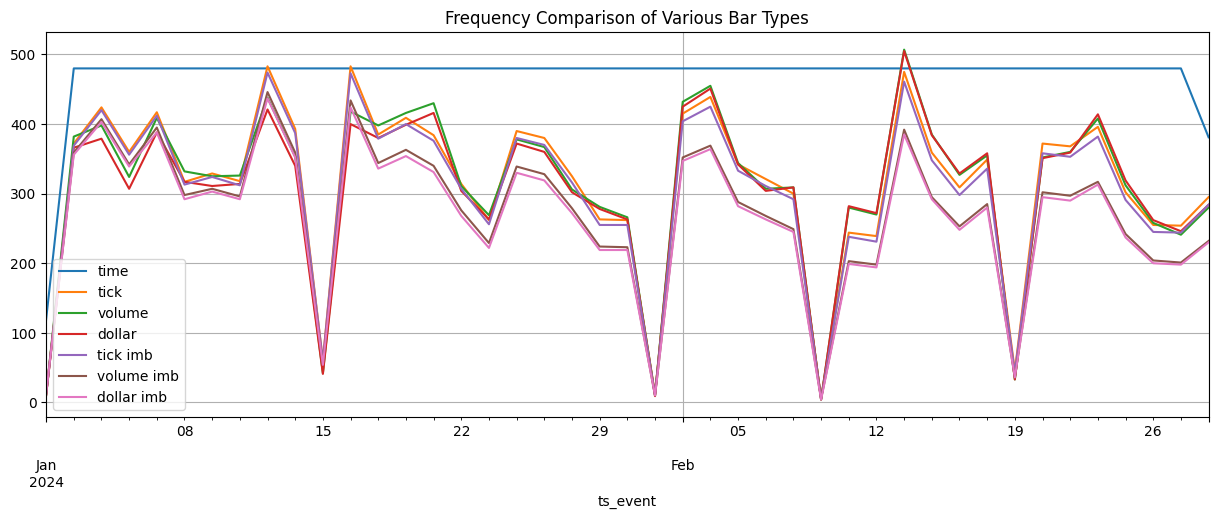

In [10]:
freq.plot(x="ts_event", y=["time", "tick", "volume", "dollar", "tick imb", "volume imb", "dollar imb"], figsize=(15, 5), title="Frequency Comparison of Various Bar Types", grid=True)
plt.show()

In [11]:
freq.describe()

,time,tick,volume,dollar,tick imb,volume imb,dollar imb
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,469.302326,312.511628,311.837209,306.348837,304.604651,270.976744,265.906977
std,56.736876,122.557542,122.427808,119.392287,120.035340,110.576086,108.535229
min,119.000000,6.000000,4.000000,4.000000,5.000000,5.000000,4.000000
25%,480.000000,262.500000,280.000000,280.000000,255.500000,226.500000,220.500000
50%,480.000000,329.000000,327.000000,319.000000,324.000000,295.000000,290.000000
75%,480.000000,387.500000,391.500000,379.500000,379.500000,343.000000,337.500000
max,480.000000,483.000000,507.000000,505.000000,474.000000,446.000000,437.000000


In [12]:
freq

,ts_event,time,tick,volume,dollar,tick imb,volume imb,dollar imb
0,2024-01-01 00:00:00-05:00,119,11,11,10,11,11,12
1,2024-01-02 00:00:00-05:00,480,372,382,366,369,359,356
2,2024-01-03 00:00:00-05:00,480,424,398,379,420,407,403
3,2024-01-04 00:00:00-05:00,480,360,324,307,356,342,339
4,2024-01-05 00:00:00-05:00,480,417,409,388,412,395,388
7,2024-01-08 00:00:00-05:00,480,317,332,317,313,298,292
8,2024-01-09 00:00:00-05:00,480,329,325,311,324,307,303
9,2024-01-10 00:00:00-05:00,480,318,326,314,312,296,292
10,2024-01-11 00:00:00-05:00,480,483,438,421,474,446,437
11,2024-01-12 00:00:00-05:00,480,393,353,340,387,359,352


## Statistical Tests of Returns for Various Bar Types

We calculate the returns of each bar type and plot the autocorrelation of returns to compare the serial correlation of each bar type. We also plot the scatter plot, histogram, and Q-Q plot of returns to compare the distribution of each bar type.

In [13]:
# calculate return on each bar type
time_bar["ret"] = time_bar["vwap"].pct_change(fill_method=None)
tick_bar["ret"] = tick_bar["vwap"].pct_change(fill_method=None)
volume_bar["ret"] = volume_bar["vwap"].pct_change(fill_method=None)
dollar_bar["ret"] = dollar_bar["vwap"].pct_change(fill_method=None)
tib_bar["ret"] = tib_bar["vwap"].pct_change(fill_method=None)
vib_bar["ret"] = vib_bar["vwap"].pct_change(fill_method=None)
dib_bar["ret"] = dib_bar["vwap"].pct_change(fill_method=None)

time_bar = time_bar.dropna()
tick_bar = tick_bar.dropna()
volume_bar = volume_bar.dropna()
dollar_bar = dollar_bar.dropna()
tib_bar = tib_bar.dropna()
vib_bar = vib_bar.dropna()
dib_bar = dib_bar.dropna()

time_bar = time_bar[time_bar["ts_event"].dt.dayofweek < 5] 
tick_bar = tick_bar[tick_bar["ts_event"].dt.dayofweek < 5]
volume_bar = volume_bar[volume_bar["ts_event"].dt.dayofweek < 5]
dollar_bar = dollar_bar[dollar_bar["ts_event"].dt.dayofweek < 5]

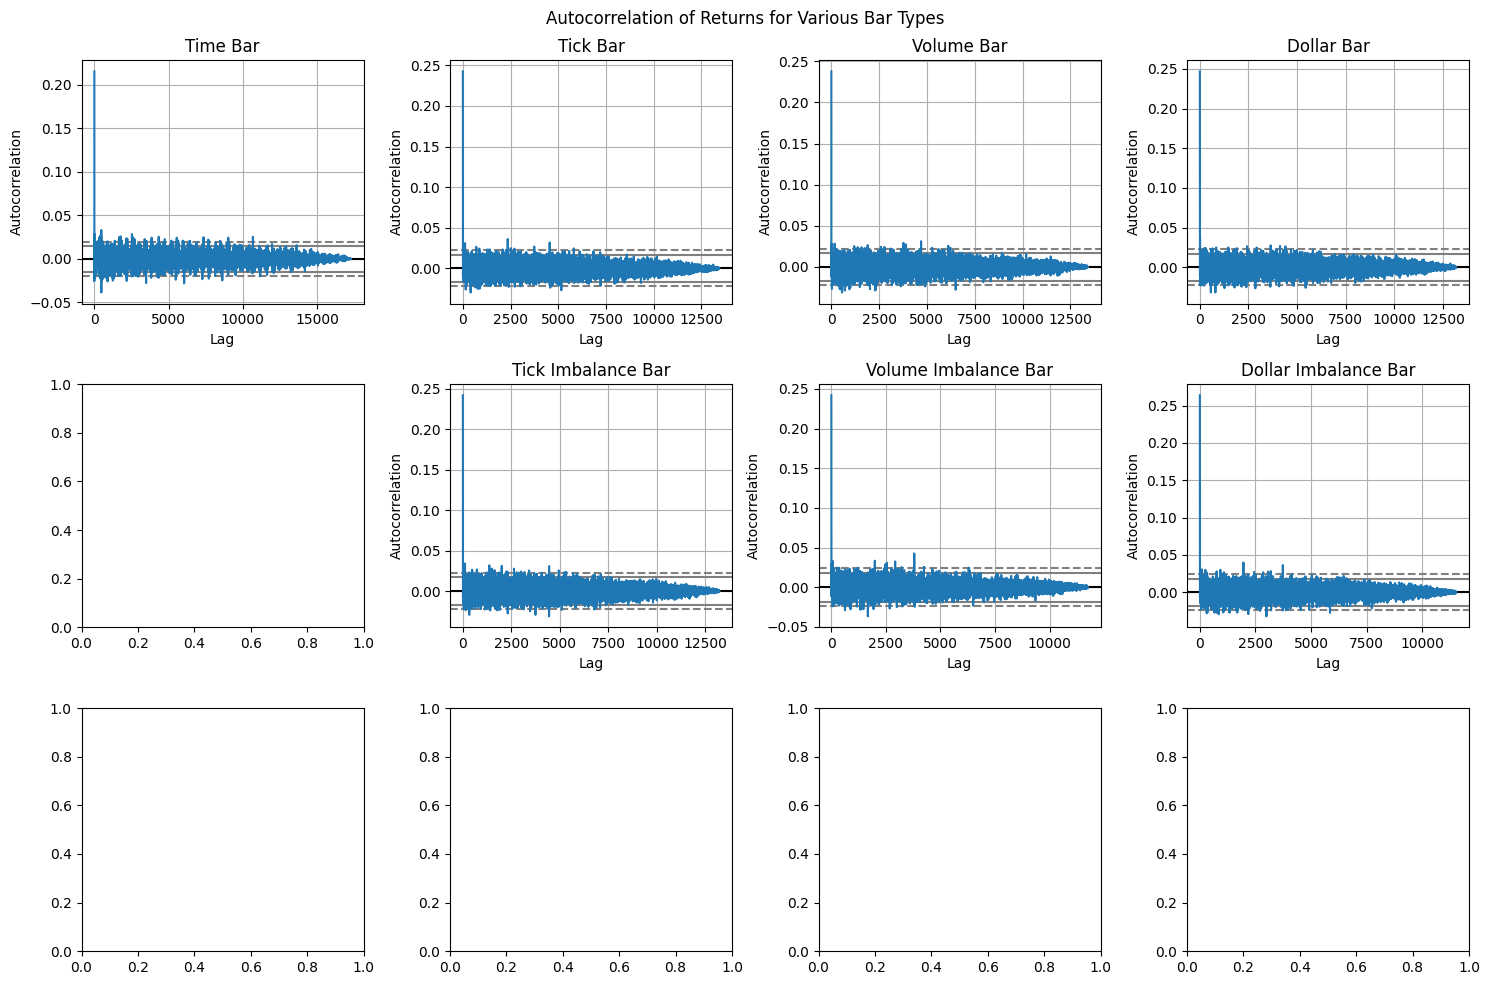

In [14]:
# plot autocorrelation of returns
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
pd.plotting.autocorrelation_plot(time_bar["ret"], ax=ax[0, 0])
ax[0, 0].set_title("Time Bar")
pd.plotting.autocorrelation_plot(tick_bar["ret"], ax=ax[0, 1])
ax[0, 1].set_title("Tick Bar")
pd.plotting.autocorrelation_plot(volume_bar["ret"], ax=ax[0, 2])
ax[0, 2].set_title("Volume Bar")
pd.plotting.autocorrelation_plot(dollar_bar["ret"], ax=ax[0, 3])
ax[0, 3].set_title("Dollar Bar")
pd.plotting.autocorrelation_plot(tib_bar["ret"], ax=ax[1, 1])
ax[1, 1].set_title("Tick Imbalance Bar")
pd.plotting.autocorrelation_plot(vib_bar["ret"], ax=ax[1, 2])
ax[1, 2].set_title("Volume Imbalance Bar")
pd.plotting.autocorrelation_plot(dib_bar["ret"], ax=ax[1, 3])
ax[1, 3].set_title("Dollar Imbalance Bar")

fig.suptitle("Autocorrelation of Returns for Various Bar Types")
plt.tight_layout()

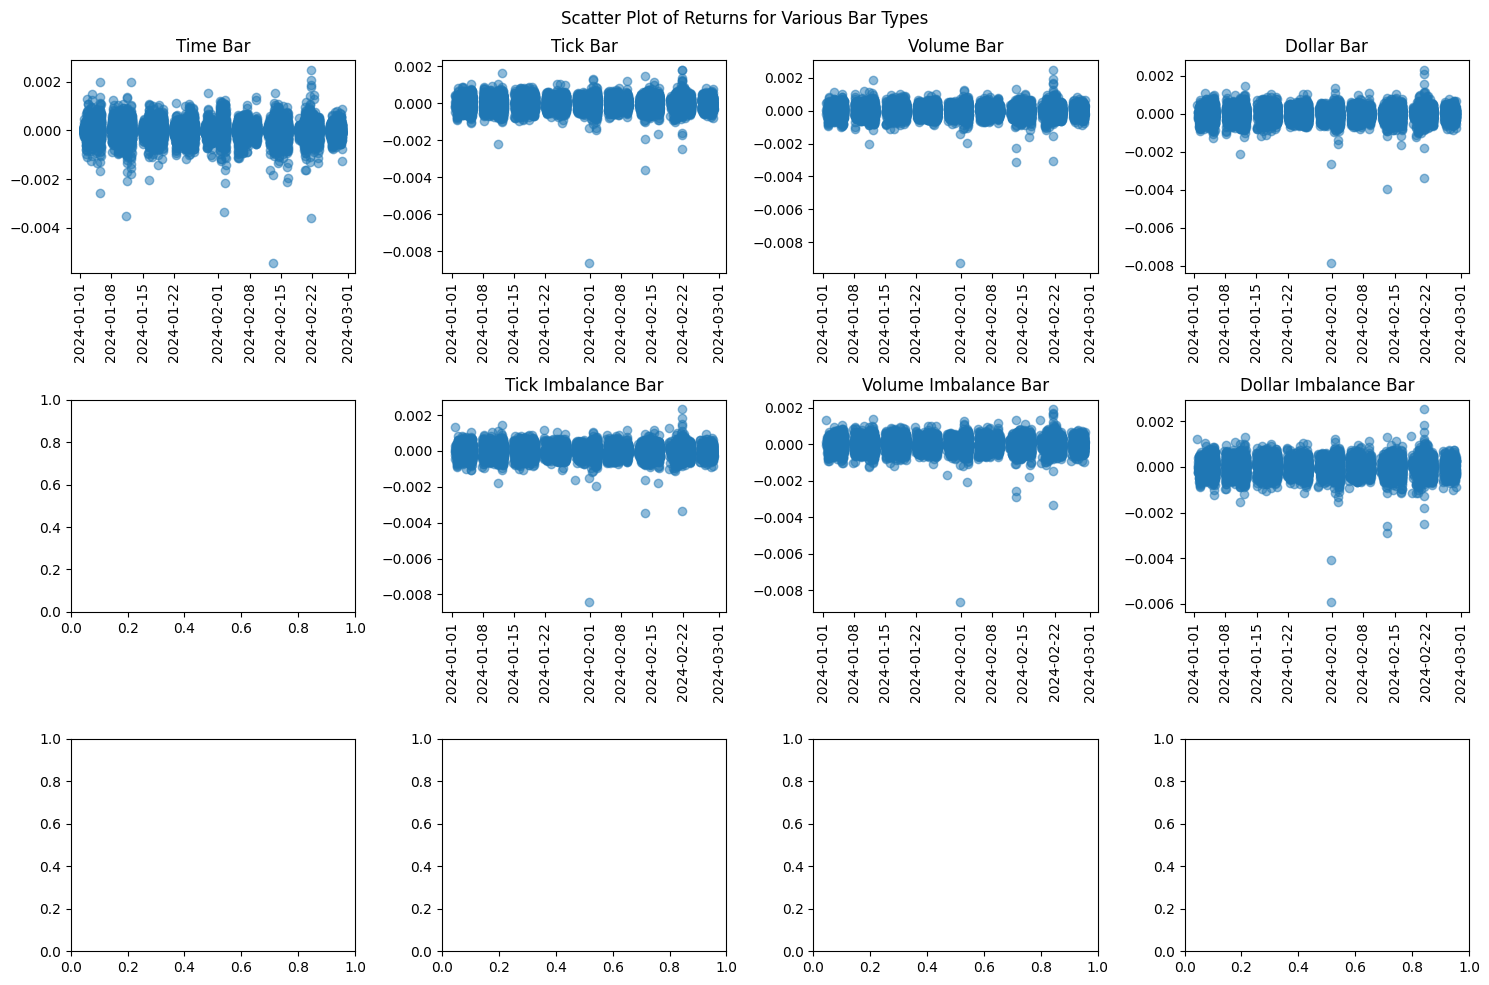

In [15]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax[0, 0].scatter(time_bar['ts_event'], time_bar['ret'], alpha=0.5)
ax[0, 0].set_title("Time Bar")
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 1].scatter(tick_bar['ts_event'], tick_bar['ret'], alpha=0.5)
ax[0, 1].set_title("Tick Bar")
ax[0, 1].tick_params(axis='x', rotation=90)
ax[0, 2].scatter(volume_bar['ts_event'], volume_bar['ret'], alpha=0.5)
ax[0, 2].set_title("Volume Bar")
ax[0, 2].tick_params(axis='x', rotation=90)
ax[0, 3].scatter(dollar_bar['ts_event'], dollar_bar['ret'], alpha=0.5)
ax[0, 3].set_title("Dollar Bar")
ax[0, 3].tick_params(axis='x', rotation=90)
ax[1, 1].scatter(tib_bar['ts_event'], tib_bar['ret'], alpha=0.5)
ax[1, 1].set_title("Tick Imbalance Bar")
ax[1, 1].tick_params(axis='x', rotation=90)
ax[1, 2].scatter(vib_bar['ts_event'], vib_bar['ret'], alpha=0.5)
ax[1, 2].set_title("Volume Imbalance Bar")
ax[1, 2].tick_params(axis='x', rotation=90)
ax[1, 3].scatter(dib_bar['ts_event'], dib_bar['ret'], alpha=0.5)
ax[1, 3].set_title("Dollar Imbalance Bar")
ax[1, 3].tick_params(axis='x', rotation=90)

fig.suptitle("Scatter Plot of Returns for Various Bar Types")
plt.tight_layout()

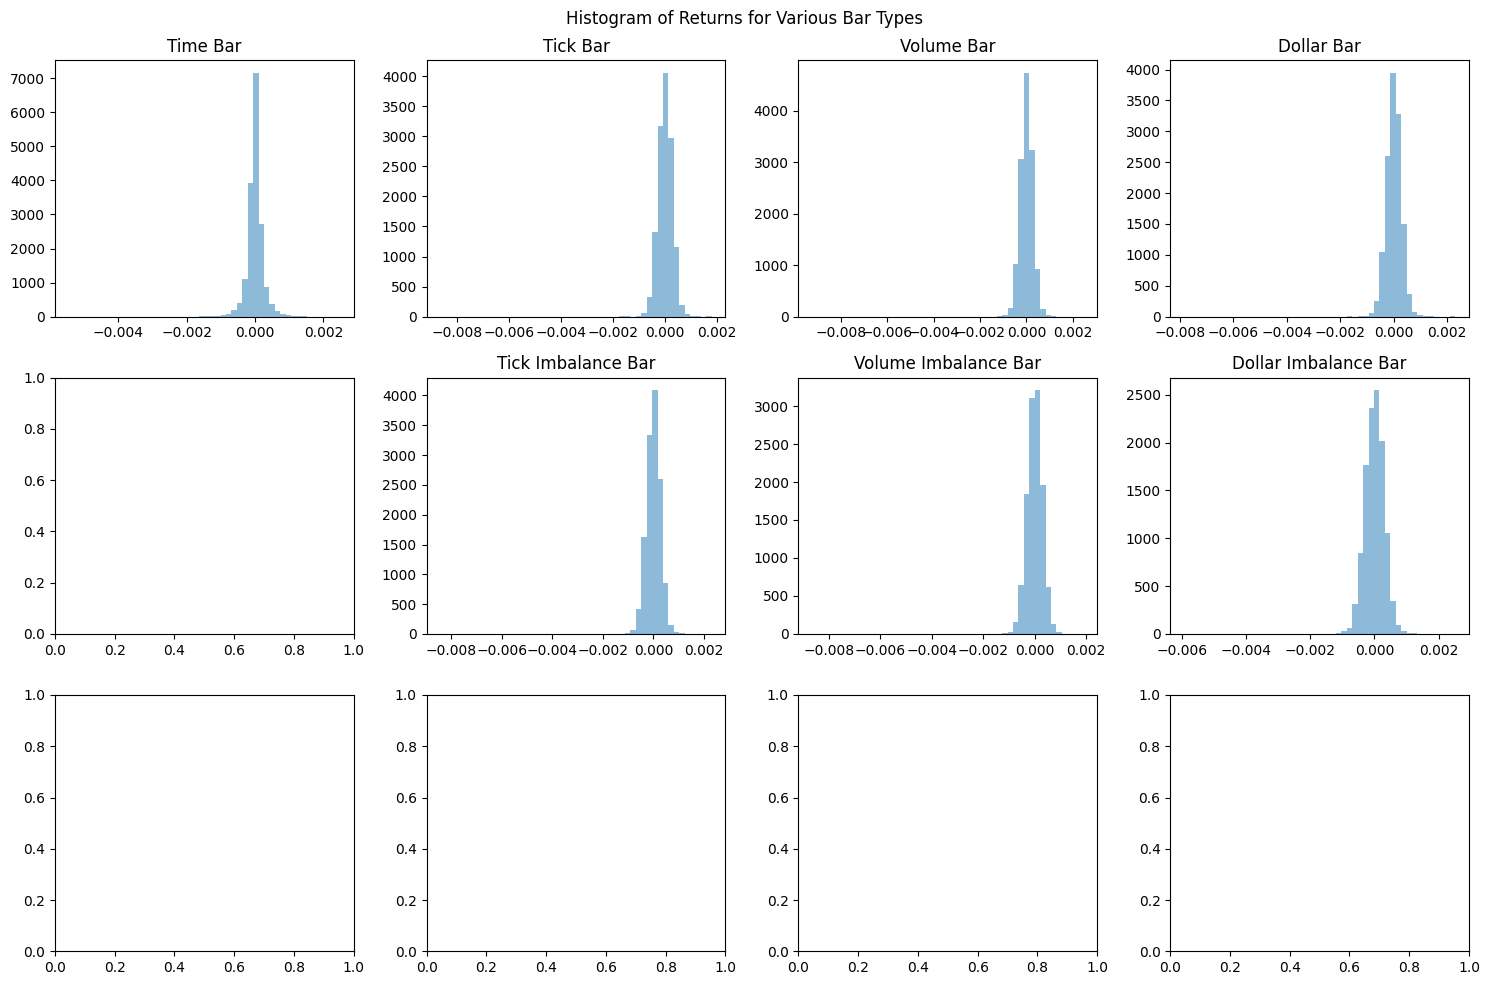

In [16]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax[0, 0].hist(time_bar['ret'], bins=50, alpha=0.5)
ax[0, 0].set_title("Time Bar")
ax[0, 1].hist(tick_bar['ret'], bins=50, alpha=0.5)
ax[0, 1].set_title("Tick Bar")
ax[0, 2].hist(volume_bar['ret'], bins=50, alpha=0.5)
ax[0, 2].set_title("Volume Bar")
ax[0, 3].hist(dollar_bar['ret'], bins=50, alpha=0.5)
ax[0, 3].set_title("Dollar Bar")
ax[1, 1].hist(tib_bar['ret'], bins=50, alpha=0.5)
ax[1, 1].set_title("Tick Imbalance Bar")
ax[1, 2].hist(vib_bar['ret'], bins=50, alpha=0.5)
ax[1, 2].set_title("Volume Imbalance Bar")
ax[1, 3].hist(dib_bar['ret'], bins=50, alpha=0.5)
ax[1, 3].set_title("Dollar Imbalance Bar")
fig.suptitle("Histogram of Returns for Various Bar Types")
plt.tight_layout()

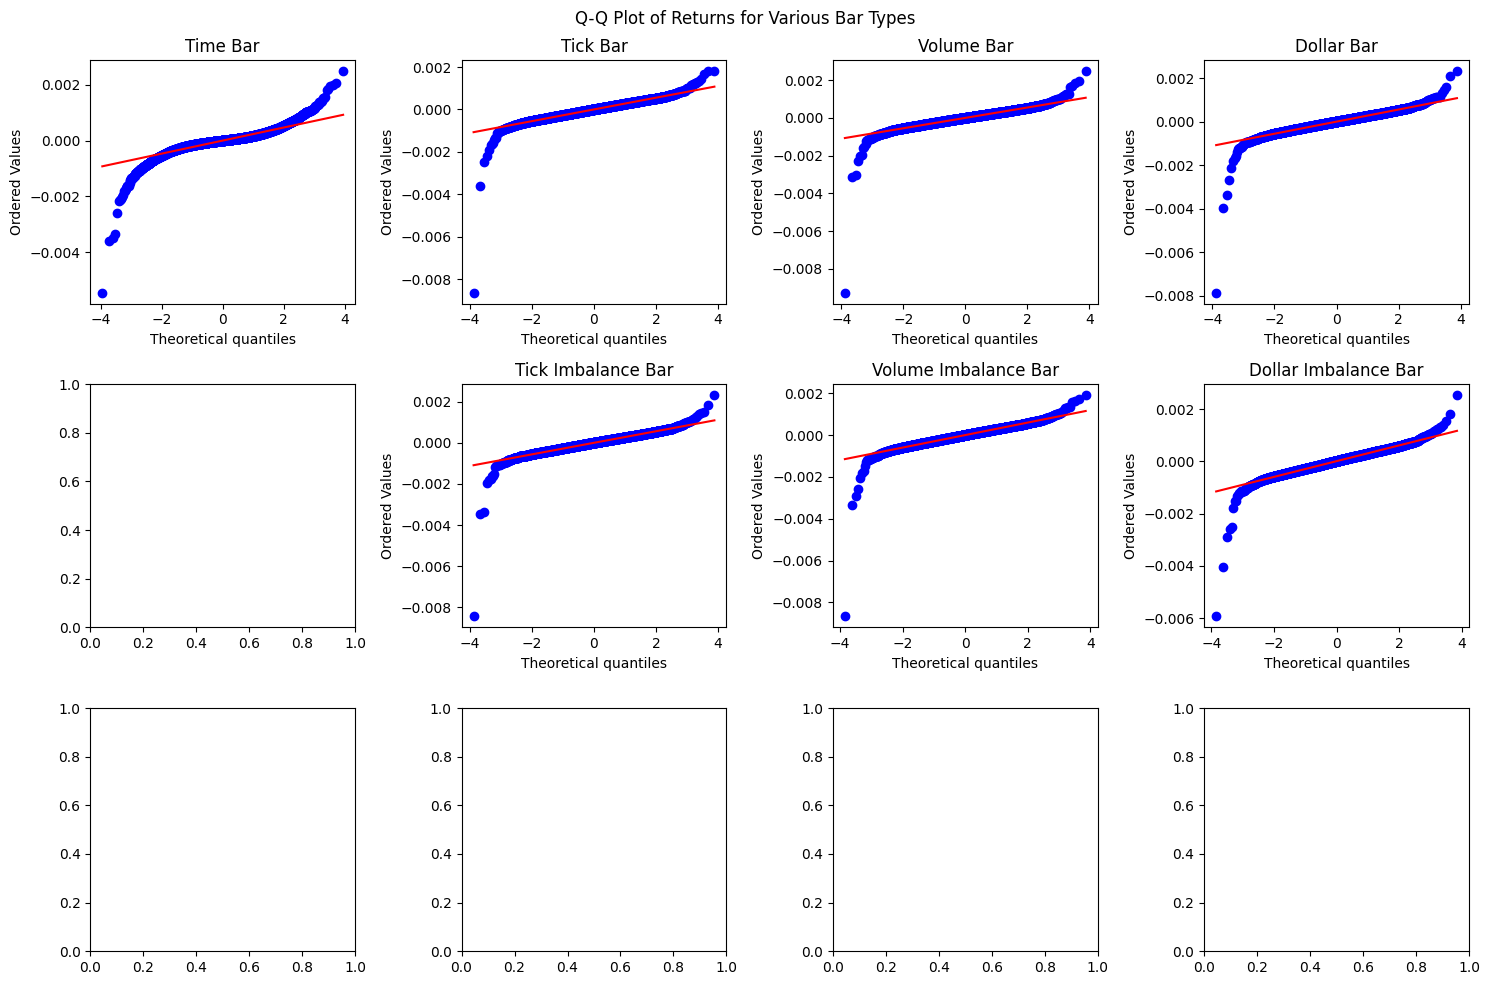

In [17]:
import scipy.stats as stats
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
stats.probplot(time_bar['ret'], dist="norm", plot=ax[0, 0])
ax[0, 0].set_title("Time Bar")
stats.probplot(tick_bar['ret'], dist="norm", plot=ax[0, 1])
ax[0, 1].set_title("Tick Bar")
stats.probplot(volume_bar['ret'], dist="norm", plot=ax[0, 2])
ax[0, 2].set_title("Volume Bar")
stats.probplot(dollar_bar['ret'], dist="norm", plot=ax[0, 3])
ax[0, 3].set_title("Dollar Bar")
stats.probplot(tib_bar['ret'], dist="norm", plot=ax[1, 1])
ax[1, 1].set_title("Tick Imbalance Bar")
stats.probplot(vib_bar['ret'], dist="norm", plot=ax[1, 2])
ax[1, 2].set_title("Volume Imbalance Bar")
stats.probplot(dib_bar['ret'], dist="norm", plot=ax[1, 3])
ax[1, 3].set_title("Dollar Imbalance Bar")

fig.suptitle("Q-Q Plot of Returns for Various Bar Types")
plt.tight_layout()
